## K-Means Clusting:  Isotopic Composition Plutonium Batches

#### Isotope vary in composition, but this data is used to analyze whether and how certain sets of proportions fit into clusters, specifically the isotopes with the highest proportions, Pu239 and Pu240.

 [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    

### Step 0: Import Packages and Load Data

In [8]:
from sklearn.cluster import KMeans#, k_means
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

%matplotlib inline

In [9]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.drop("Unnamed: 0",axis=1,inplace=True)

### Step 1: Explore Data

In [10]:
df.head()

,Pu238,Pu239,Pu240,Pu241
0,0.126,75.804,21.204,2.180
1,0.133,75.515,21.408,2.240
2,0.127,75.175,21.668,2.305
3,0.156,78.872,18.428,1.906
4,0.503,73.317,20.223,4.128


**Visualize the data**

Text(0.5, 1.0, 'Pu239 vs Pu240 Isotope Percentages in Plutonium')

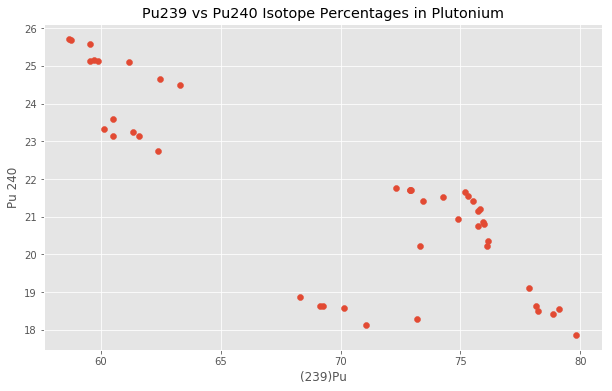

In [11]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df['Pu239'],df['Pu240'])
plt.xlabel("(239)Pu")
plt.ylabel("Pu 240")
plt.title("Pu239 vs Pu240 Isotope Percentages in Plutonium")

Observations: This plot there appears to be 3, 4, maybe 5 clusters.

### Step 3: Modeling:

**Set "Pu239" and "Pu240" as features, initialize 3 clusters and scale data**

In [27]:
# A: 
X = df[['Pu239','Pu240']]
kmeans = KMeans(n_clusters=3)
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
kmeans.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

In [29]:
preds = kmeans.labels_
preds

array([2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       1], dtype=int32)

**Assign clusters assignments (predictions) back to the original dataframe**

In [30]:
kmeans.cluster_centers_

array([[ 0.63767668, -1.2653207 ],
       [-1.31858916,  1.19688286],
       [ 0.67370652, -0.15385525]])

In [31]:
df_X_scaled = pd.DataFrame(X_scaled, columns =["Pu239","Pu240"])

In [32]:
df_X_scaled.head()

,Pu239,Pu240
0,0.832106,-0.138176
1,0.791133,-0.052625
2,0.742931,0.056409
3,1.267063,-1.302330
4,0.479518,-0.549572


In [33]:
df_X_scaled['clusters'] = preds
df_X_scaled.head()

,Pu239,Pu240,clusters
0,0.832106,-0.138176,2
1,0.791133,-0.052625,2
2,0.742931,0.056409,2
3,1.267063,-1.302330,0
4,0.479518,-0.549572,2


** Plot the centroids from the model **

In [34]:
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=["x","y"])
centroids

,x,y
0,0.637677,-1.265321
1,-1.318589,1.196883
2,0.673707,-0.153855


In [41]:
colors = ["b", "darkorchid","lightseagreen"]
df_X_scaled['colors'] = df_X_scaled['clusters'].map(lambda p: colors[p])

In [42]:
df_X_scaled.head()

,Pu239,Pu240,clusters,colors
0,0.832106,-0.138176,2,lightseagreen
1,0.791133,-0.052625,2,lightseagreen
2,0.742931,0.056409,2,lightseagreen
3,1.267063,-1.302330,0,b
4,0.479518,-0.549572,2,lightseagreen


Text(0.5, 1.0, 'Pu239 vs Pu240 Isotope Percentages in Plutonium')

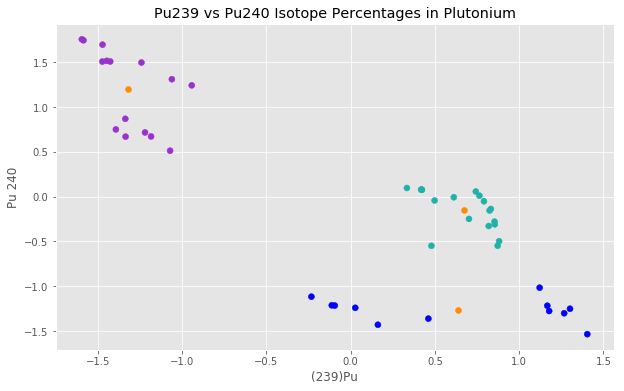

In [46]:
# A:
fig = plt.figure(figsize=(10,6))
plt.scatter(df_X_scaled['Pu239'],df_X_scaled['Pu240'],c=df_X_scaled['colors'])
#add centroids
plt.scatter(centroids['x'],centroids['y'],c='darkorange')
plt.xlabel("(239)Pu")
plt.ylabel("Pu 240")
plt.title("Pu239 vs Pu240 Isotope Percentages in Plutonium")


** Calculate silhouette score **

In [45]:
silhouette_score(df_X_scaled[['Pu239', 'Pu240']], df_X_scaled['clusters'])

0.633217477686232

The silhouette score should be aiming for 1.0, soa score of 0.63 is ok - but could it be better? From the looks of the plot, 3 cluster is ok, but let's try more and see if the scores improves.

#### Initialize 4 clusters and scale data

In [61]:
X = df[['Pu239','Pu240']]
kmeans = KMeans(n_clusters=4)
ss = StandardScaler()
X_scaled2 = ss.fit_transform(X)
kmeans.fit(X_scaled2)
preds2 = kmeans.labels_

In [62]:
df_X_scaled2 = pd.DataFrame(X_scaled2,columns=["Pu239","Pu240"])
df_X_scaled2['clusters'] = preds2

In [64]:
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=["x","y"])

In [65]:
colors = ["green", "b", "darkorchid","lightseagreen"]
#df['color'] = 
df_X_scaled2['colors'] = df_X_scaled2['clusters'].map(lambda p: colors[p])

In [66]:
df_X_scaled2.head()

,Pu239,Pu240,clusters,colors
0,0.832106,-0.138176,1,b
1,0.791133,-0.052625,1,b
2,0.742931,0.056409,1,b
3,1.267063,-1.302330,3,lightseagreen
4,0.479518,-0.549572,1,b


Text(0.5, 1.0, 'Pu239 vs Pu240 Isotope Percentages in Plutonium')

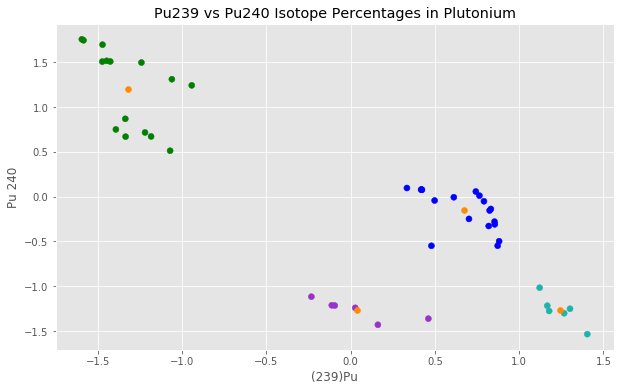

In [67]:
# A:
fig = plt.figure(figsize=(10,6))
plt.scatter(df_X_scaled2['Pu239'],df_X_scaled2['Pu240'],c=df_X_scaled2['colors'])
#add centroids
plt.scatter(centroids['x'],centroids['y'],c='darkorange')
plt.xlabel("(239)Pu")
plt.ylabel("Pu 240")
plt.title("Pu239 vs Pu240 Isotope Percentages in Plutonium")

In [68]:
silhouette_score(df_X_scaled2[['Pu239', 'Pu240']], df_X_scaled2['clusters'])

0.7196283186162103

Adding a more cluster (total 4) improved the Silhouette score by 9%.

#### Initialize 5 clusters

In [70]:
X = df[['Pu239','Pu240']]
kmeans = KMeans(n_clusters=5)
ss = StandardScaler()
X_scaled2 = ss.fit_transform(X)
kmeans.fit(X_scaled2)
preds2 = kmeans.labels_

In [71]:
df_X_scaled2 = pd.DataFrame(X_scaled2,columns=["Pu239","Pu240"])
df_X_scaled2['clusters'] = preds2

In [72]:
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=["x","y"])

In [73]:
colors = ["green", "b", "darkorchid","lightseagreen","fuchsia"]
#df['color'] = 
df_X_scaled2['colors'] = df_X_scaled2['clusters'].map(lambda p: colors[p])

In [74]:
df_X_scaled2.head()

,Pu239,Pu240,clusters,colors
0,0.832106,-0.138176,1,b
1,0.791133,-0.052625,1,b
2,0.742931,0.056409,1,b
3,1.267063,-1.302330,2,darkorchid
4,0.479518,-0.549572,1,b


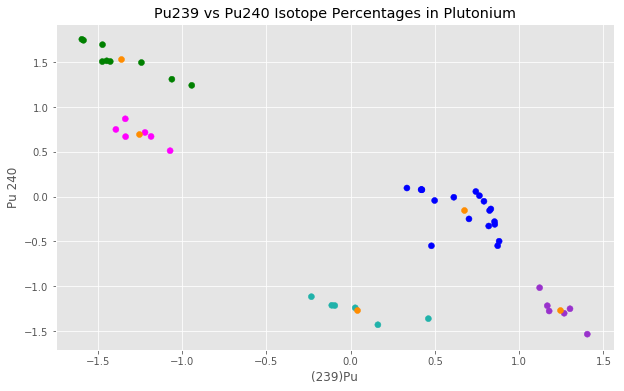

In [75]:
# A:
fig = plt.figure(figsize=(10,6))
plt.scatter(df_X_scaled2['Pu239'],df_X_scaled2['Pu240'],c=df_X_scaled2['colors'])
#add centroids
plt.scatter(centroids['x'],centroids['y'],c='darkorange')
plt.xlabel("(239)Pu")
plt.ylabel("Pu 240")
plt.title("Pu239 vs Pu240 Isotope Percentages in Plutonium");

In [76]:
silhouette_score(df_X_scaled2[['Pu239', 'Pu240']], df_X_scaled2['clusters'])

0.6861082018190413

While visualizally, 5 clusters makes sense, the silhouette scores did not improve from 4 clusters. 